# &#x1F4D1; &nbsp;  The Data Set of Flower Images

## &#x1F310; &nbsp; 0. Code Library, Style and Links

In [3]:
library(IRdisplay)
library(repr)
library(tensorflow)
library(keras)
library(imager)

In [2]:
display_html("<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron');
body {background-color: gainsboro;} 
a {color: #818286; font-family: Orbitron;} 
h1, h2 {color: #37c9e1; font-family: Orbitron; text-shadow: 4px 4px 4px #ccc;} 
h3, h4 {color: #818286; font-family: Orbitron; text-shadow: 4px 4px 4px #ccc;}
span {text-shadow: 4px 4px 4px #ccc;}        
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategray;}        
</style>")

## &#x1F310; &nbsp; 1. Explore the Data

In [32]:
flowers <- read.csv("/Users/olgabelitskaya/cookbooks/flower_images/flower_labels.csv")
head(flowers,3)

file,label
0001.png,0
0002.png,0
0003.png,2


In [33]:
flower_targets <- as.matrix(flowers["label"])
flower_targets <- keras::to_categorical(flower_targets, 10)
dim(flower_targets)

[1] 210  10

In [34]:
image_paths <- list.files("/Users/olgabelitskaya/cookbooks/flower_images", 
                          recursive = TRUE, full.names = TRUE)
image_paths <- image_paths[1:(length(image_paths)-1)]
image_paths[1:3]

[1] "/Users/olgabelitskaya/cookbooks/flower_images/0001.png"
[2] "/Users/olgabelitskaya/cookbooks/flower_images/0002.png"
[3] "/Users/olgabelitskaya/cookbooks/flower_images/0003.png"

In [51]:
img_path <- "/Users/olgabelitskaya/cookbooks/flower_images/0001.png"
img <- keras::image_load(img_path, target_size=c(128,128))
img <- image_to_array(img) / 255
img <- array_reshape(img, c(1,128,128,3))
dim(img)

[1]   1 128 128   3

[1] 128 128

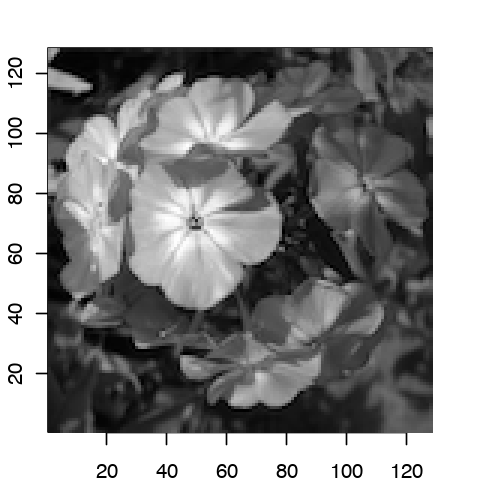

In [53]:
gr_img <- array_reshape(grayscale(img), c(128,128))
options(repr.plot.width=4,repr.plot.height=4)
par(mar=c(2,2,2,2))
dim(gr_img)
image(c(1:128),c(1:128),gr_img,col=grey(seq(0,1,length=256)))

[1] 128 128   1   4

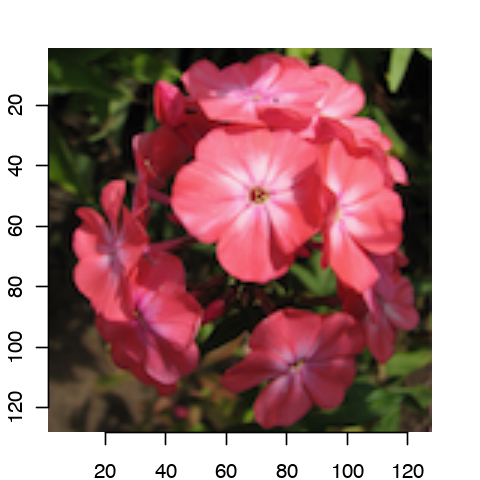

In [52]:
# 'imager'
im <- load.image(img_path)
options(repr.plot.width=4,repr.plot.height=4)
par(mar=c(2,2,2,2))
dim(im)
plot(im)

In [138]:
image_loading <- function(image_path) {
    image <- keras::image_load(image_path, target_size=c(128,128))
    image <- image_to_array(image) / 255
    image <- array_reshape(image, c(1, dim(image)))
    return(image)
}

In [144]:
flower_tensors <- lapply(image_paths, image_loading)
flower_tensors <- array_reshape(flower_tensors, c(210,128,128,3))

In [145]:
dim(flower_tensors); dim(flower_targets)

[1] 210 128 128   3

[1] 210  10